In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette("Set1")

In [2]:
# Read file into dataframe
df = pd.read_csv(r"C:\Users\LENOVO\Documents\My Files Practice\Zomato-data-.csv")
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [3]:
# Get summary about the data frame 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [4]:
 # 1. Check for missing values
print("Missing values per column:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Missing values per column:
Series([], dtype: int64)


In [5]:
# 2. Remove the denominator in the rate column to put data in cleaner format
def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)

In [6]:
df['rate']=df['rate'].apply(handleRate)
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [8]:
 # 3. Standardize categorical columns
df["online_order"] = df["online_order"].str.strip()
df["book_table"] = df["book_table"].str.strip()
df["resturant_type"] = df["listed_in(type)"].str.strip()

In [9]:
df["cost_for_two"] = df["approx_cost(for two people)"]

In [10]:
# 4. Drop columns
df.drop(columns = ["approx_cost(for two people)", "listed_in(type)"], axis = 1, inplace = True)

In [11]:
df.head()

,name,online_order,book_table,rate,votes,resturant_type,cost_for_two
0,Jalsa,Yes,Yes,4.1,775,Buffet,800
1,Spice Elephant,Yes,No,4.1,787,Buffet,800
2,San Churro Cafe,Yes,No,3.8,918,Buffet,800
3,Addhuri Udupi Bhojana,No,No,3.7,88,Buffet,300
4,Grand Village,No,No,3.8,166,Buffet,600


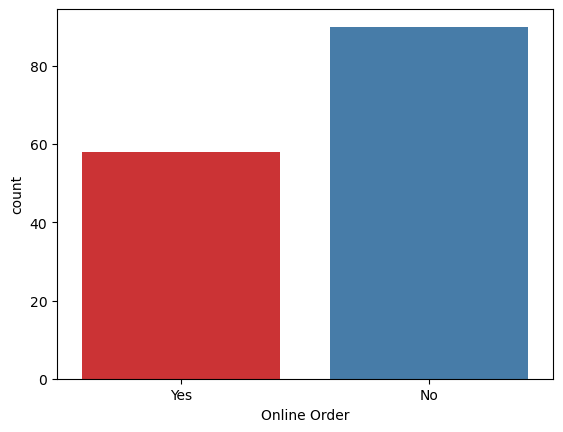

In [12]:
# Exploring online vs offline order
sns.countplot(x = df["online_order"], hue = df["online_order"])
plt.xlabel("Online Order");


In [58]:
online_order_percentage = ((df["online_order"].value_counts(normalize = True))*100).round(2)
print(online_order_percentage)

online_order
No     60.81
Yes    39.19
Name: proportion, dtype: float64


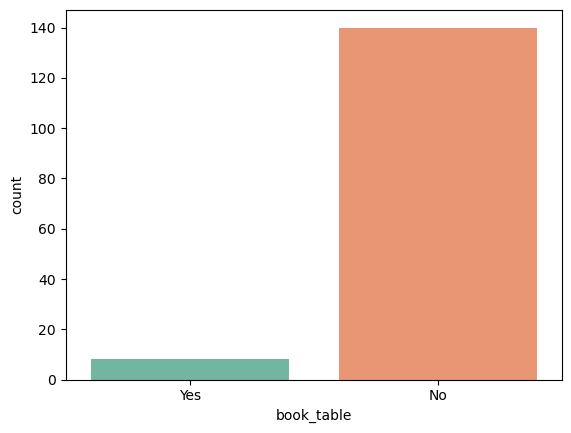

In [56]:
# Exploring resturants that offer table booking
sns.countplot(x = df["book_table"], hue = df["book_table"], palette = "Set2");

In [60]:
table_booking_percentage = ((df["book_table"].value_counts(normalize = True))*100).round(2)
print(table_booking_percentage)

book_table
No     94.59
Yes     5.41
Name: proportion, dtype: float64


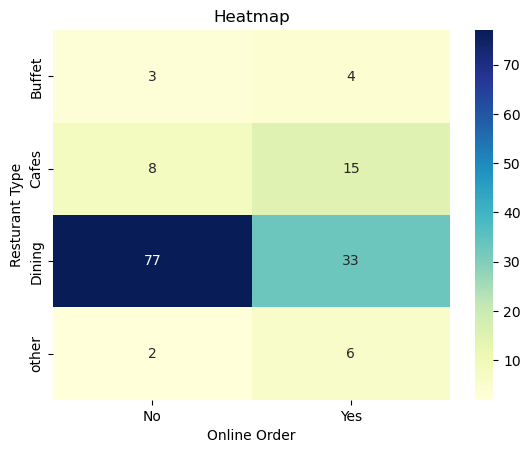

In [13]:
# Order mode prefered by resturant type
pivot_table = df.pivot_table(index="resturant_type", columns="online_order", aggfunc="size", fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Resturant Type")
plt.show()

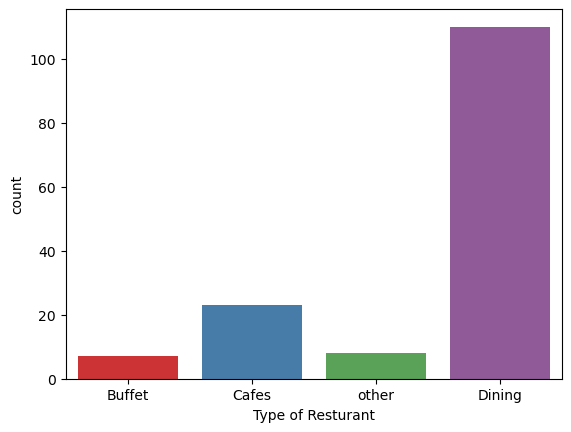

In [15]:
# Exploring the resturant types by availability
sns.countplot(x = df["resturant_type"], hue = df["resturant_type"])
plt.xlabel("Type of Resturant");

In [16]:
percentage_of_resturant_type = ((df["resturant_type"].value_counts(normalize = True)) * 100).round(2)
print(percentage_of_resturant_type)

resturant_type
Dining    74.32
Cafes     15.54
other      5.41
Buffet     4.73
Name: proportion, dtype: float64


Text(0.5, 1.0, 'Resturant Type Popularity Chart')

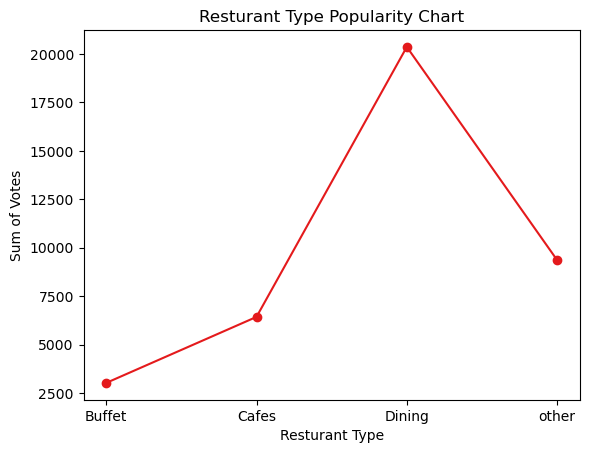

In [17]:
# Exploring resturant types by popularity
grouped_data = df.groupby("resturant_type")["votes"].sum()
plt.plot(grouped_data, marker = "o")
plt.xlabel("Resturant Type")
plt.ylabel("Sum of Votes")
plt.title("Resturant Type Popularity Chart")

In [68]:
grouped_data.to_frame()

,votes
resturant_type,
Buffet,3028
Cafes,6434
Dining,20363
other,9367


In [18]:
# Price category function
def categorize_price(cost):
    if cost <= 300:
        return 'Budget (≤300)'
    elif cost <= 600:
        return 'Mid-range (301-600)'
    elif cost <= 900:
        return 'Premium (601-900)'
    else:
        return 'Luxury (>900)'
    
df['price_category'] = df['cost_for_two'].apply(categorize_price)
    

In [19]:
# Analyze preferences by votes (popularity proxy)
price_analysis = df.groupby("price_category").agg({
        "votes": ["count", "sum", "mean"],
        "rate": "mean",
        "cost_for_two": "mean"
 }).round(2)
    
price_analysis.columns = ["num_restaurants", "total_votes", "avg_votes_per_restaurant", "avg_rating", "avg_cost"]
    
# Sort by total votes to see most popular price ranges
price_analysis = price_analysis.sort_values("total_votes", ascending=False)

In [20]:
price_analysis

,num_restaurants,total_votes,avg_votes_per_restaurant,avg_rating,avg_cost
price_category,,,,,
Mid-range (301-600),54,21561,399.28,3.69,485.19
Premium (601-900),26,14001,538.50,3.79,775.00
Budget (≤300),67,3591,53.60,3.53,217.91
Luxury (>900),1,39,39.00,3.70,950.00


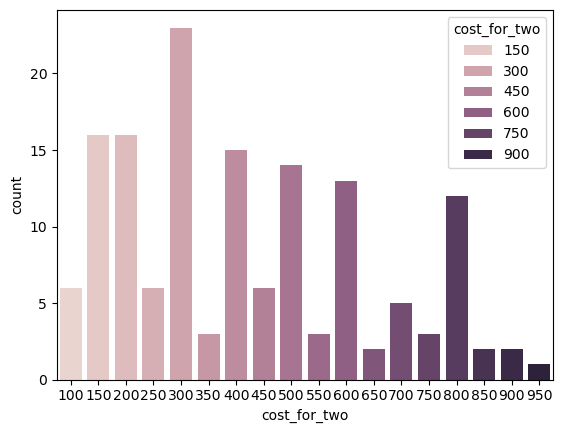

In [21]:
# Exploring the price rate for couples
sns.countplot(x= df["cost_for_two"], hue = df["cost_for_two"]);

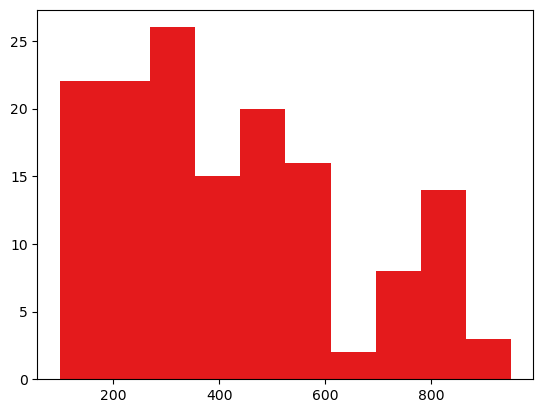

In [22]:
plt.hist(x=df["cost_for_two"], bins = 10);